# Final Project


## TODO: Add project description here

In [1]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import cv2
import matplotlib.pyplot as plt

this_dir: str = os.path.abspath('')
assets_dir: str = os.path.join(this_dir, "..", "..", "assets", "notebooks", "project")

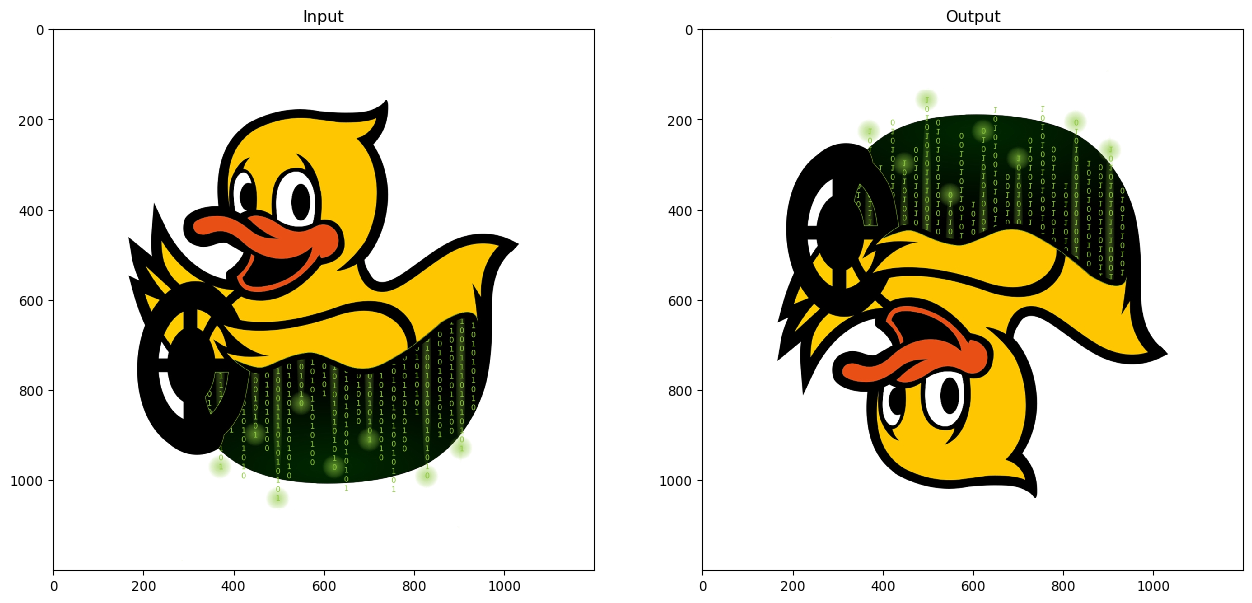

In [2]:
# Example component

from final_project.components import FlipImageComponent


# make figure
fig = plt.figure(figsize=(16, 9), dpi=96)

# define component
flip: FlipImageComponent = FlipImageComponent(axis=0)
flip.start()

# read image from disk
image_fpath: str = os.path.join(assets_dir, "duckietown.jpg")
image: np.ndarray = cv2.imread(image_fpath)

# plot input
subfig = fig.add_subplot(1, 2, 1)
subfig.imshow(cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA))
subfig.set_title("Input")

# feed image to component
flip.in_bgr.put(image)

# get result
image2: np.ndarray = flip.out_bgr.get()

# plot output
subfig = fig.add_subplot(1, 2, 2)
subfig.imshow(cv2.cvtColor(image2, cv2.COLOR_BGRA2RGBA))
subfig.set_title("Output")

# stop component
flip.stop()

In [3]:
import threading
threading.active_count()

8

In [4]:
# Sensor - Camera

from duckietown.components import CameraDriverComponent

camera: CameraDriverComponent = CameraDriverComponent(vehicle_name="db21j3")

ImportError: cannot import name 'CameraComponent' from 'duckietown.components' (/code/HS23-lx/packages/duckietown/components.py)

In [ ]:
# Image Cropping

from duckietown.components import ImageCropComponent

camera: ImageCropComponent = ImageCropComponent(parameters=CameraDriverComponent.DEFAULT_CAMERA_PARAMETERS)



In [ ]:
# Line Detector

from duckietown.components import LineDetectorComponent

line_detector: LineDetectorComponent = LineDetectorComponent()

In [ ]:
# Lane Filter

from duckietown.components import LaneFilterComponent

lane_filter: LaneFilterComponent = LaneFilterComponent(camera_parameters=CameraComponent.DEFAULT_CAMERA_PARAMETERS)

In [ ]:
# Lane Controller

from duckietown.components import LaneControllerComponent

lane_controller: LaneControllerComponent = LaneControllerComponent()

In [ ]:
# Inverse Kinematics

from duckietown.components import InverseKinematicsComponent

inverse_kinematics: InverseKinematicsComponent = InverseKinematicsComponent()

In [ ]:
# PWM Mapper

from duckietown.components import PWMComponent

pwm: PWMComponent = PWMComponent()

In [ ]:
# Wheels Driver

from duckietown.components import DuckiematrixMotorDriverComponent

motors: DuckiematrixMotorDriverComponent = DuckiematrixMotorDriverComponent()

In [ ]:
# Connect components

line_detector.in_bgr.wants(camera.out_bgr)

lane_filter.in_lines.wants(line_detector.out_lines)
lane_filter.in_command.wants(motors.out_command_time)
lane_filter.in_command.wants(lane_controller.out_v_omega)

lane_controller.in_d_phi.wants(lane_filter.out_d_phi)

inverse_kinematics.in_v_omega.wants(lane_controller.out_v_omega)

pwm.in_wl_wr.wants(inverse_kinematics.out_wl_wr)

motors.in_pwml_pwmr.wants(pwm.out_pwml_pwmr)

In [ ]:
import threading
threading.active_count()

8

In [ ]:
import time
from typing import List
from duckietown.components import Component

components: List[Component] = [
    camera,
    line_detector,
    lane_filter,
    lane_controller,
    inverse_kinematics,
    pwm,
    motors
]
# start components
for component in components:
    component.start()


time.sleep(100)


# TODO: investigate removing Thread as subclass of component and have the component define start() where a new Thread is spawned if one is not available yet 
# and follows it. This avoids the 'RuntimeError: threads can only be started once' and be able to restart a Thread without the need to recreate the component.

# TODO: we need a System class that takes in a list of components and runs them, a method run() will run all the components and keep the cell alive, 
# catch KeyboardInterrupt from the jupyter STOP button and stop the components gracefully.

Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/code/HS23-lx/packages/duckietown/components.py", line 86, in run
INFO:ControlSocket:Establishing link to CONTROL connector at tcp://localhost:7501...
    self.worker()
  File "/code/HS23-lx/packages/duckietown/components.py", line 502, in worker
    a = 5 / 0
ZeroDivisionError: division by zero


KeyboardInterrupt: 

In [ ]:
import threading
threading.active_count()

10

In [ ]:
# stop components
for component in components:
    component.stop()

In [ ]:
import time

try:
    time.sleep(10)
except KeyboardInterrupt:
    time.sleep(2)
    print("well done")

well done
